## 신경망 개요
# 신경망 구조

### 활성화 함수 (Activation function)
<img src="https://missinglink.ai/wp-content/uploads/2018/11/activationfunction-1.png" /><br>
(출처: https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

<img src="https://qph.fs.quoracdn.net/main-qimg-b019133b165292e51bcbac7b26f0ad61" /><br>
<img src="https://qph.fs.quoracdn.net/main-qimg-c507902ce841dfeb1c5988e199d03115" /><br>
(출처: https://www.quora.com/What-is-meant-by-activation-function)

<img src="https://i.stack.imgur.com/76Kuo.png" /><br>
(출처: https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications)

- 활성화 함수의 기본 역할은 신호를 전달할지 막을지를 결정하는 것이다
- 중간층과 뉴런 갯수를 아무리 늘려도 활성화 함수를 적용하지 않으면 뉴런을 늘린 의미가 없어진다
- 활성화 함수는 모든 뉴런에 적용한다. 단, 같은 중간층에서는 같은 활성화 함수를 적용한다
- 일반적인 신경망에서는 **시그모이드 함수**를 자주 적용하고, 이미지 관련 딥러닝에서는 주로 **ReLU**를 적용한다

### 출력층에서의 활성화 함수
- 회귀의 경우 일반적으로 활성화 함수를 적용하지 않는다
- 이진분류의 경우 대부분 **시그모이드 함수**를 적용한다
- 다중분류의 경우 대부분 **소프트맥스 함수**를 적용한다

### 활성화 함수 모양

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Text(0.5,1,'sigmoid')

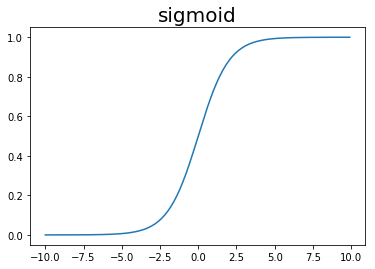

In [6]:
rng = np.arange(-10,10,0.1)
plt.plot(rng, sigmoid(rng))
plt.title("sigmoid", fontsize=20)

In [3]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

Text(0.5,1,'tanh')

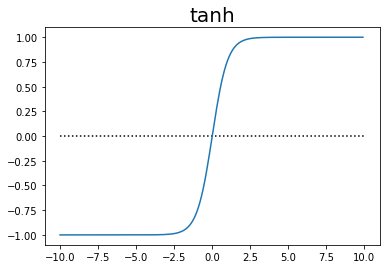

In [4]:
rng = np.arange(-10,10,0.1)
plt.plot(rng, tanh(rng))
#plt.plot(rng, np.tanh(rng))
plt.hlines([0],-10,10, linestyles=':')
plt.title("tanh", fontsize=20)

Text(0.5,1,'LeRU')

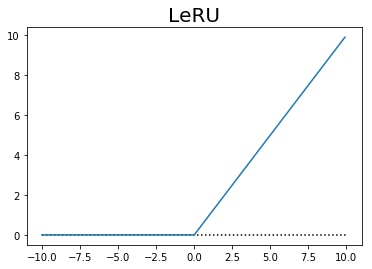

In [14]:
rng = np.arange(-10,10,0.1)
plt.hlines([0],-10,10, linestyles=':')
plt.plot(rng, np.maximum(0,rng))
plt.title("LeRU", fontsize=20)

In [11]:
def relu(x):
    return np.maximum(x, 0)

def relu2(x):
    return np.where(x>0, x, 0)

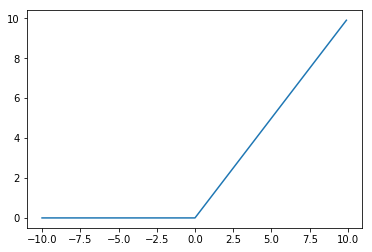

In [12]:
x = np.arange(-10,10,0.1)
plt.plot(x, relu2(x))

### 가장 간단한 신경망
- 선형회귀
- 로지스틱회귀 (이진분류)

### 선형회귀의 신경망
- 중간층 없음 => 입력층과 출력층만 있음
- 출력층에 활성화함수 적용하지 않음
- 비용함수는 MSE 를 사용함

<img src="https://miro.medium.com/max/1400/1*XPThP6QC5VkeG3VzI0FhIQ.png" /><br>
(출처: https://medium.com/duke-ai-society-blog/training-neural-networks-for-binary-classification-identifying-types-of-breast-cancer-keras-in-r-b38fb26a500c)

- iris 에서 petal length 를 입력값으로 petal width 를 목표값으로 적용해보자

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()

In [15]:
x = iris.data[:,2]
y = iris.data[:,3]

In [16]:
w = np.random.randn()
b = np.random.randn()
w, b

(0.22661183573412, -0.15098291287149918)

In [17]:
pred_y = x*w + b

In [18]:
mse = np.square(y-pred_y).mean()
mse

0.40159582290555385

In [21]:
w = w+0.000001
pred_y = x*w + b
mse = np.square(y-pred_y).mean()
mse

0.4015909061788462

- 세가지 속성값을 입력값으로 하여 petal_width 값을 예측해 보자

In [22]:
X = iris.data[:,:3]
y = iris.data[:,3]

In [28]:
w1 = 1
w2 = -1
w3 = 0
b = 0

In [29]:
pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b

In [30]:
mse = ((y-pred_y)**2).mean()
mse

2.793333333333334

In [31]:
w1 -= 0.001
pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b
mse = ((y-pred_y)**2).mean()
mse

2.774365225666667

In [32]:
X = iris.data[:,:3]
y = iris.data[:,3]

In [33]:
X.shape, y.shape

((150, 3), (150,))

In [34]:
w = np.random.randn(3) # [w1, w2, w3]
b = np.random.randn()
w, b

(array([-0.05615708,  0.38861415, -0.03248669]), -1.395341434927157)

In [35]:
w.shape

(3,)

In [36]:
pred_y = X@w + b
#pred_y = np.sum(X*w, axis=1) + b

In [37]:
mse = np.square(y-pred_y).mean()
mse

4.309011376859402

### 로지스틱회귀(이진분류) 에서의 신경망
- 중간층 없음
- 출력층에 **시그모이드 함수**를 활성화함수로 적용함
- 활성화함수로 이진교차엔트로피를 사용함

<img src="https://donarthurzhang.files.wordpress.com/2017/08/screen-shot-2017-08-11-at-6-41-57-pm.png?w=1024" /><br>
(출처: https://projectsig.com/2017/08/11/logistic-regression-with-a-neural-network-cat-recognizer/)

- 유방암 데이터에서 로지스틱 회귀를 적용해 출력값을 계산해 보자

In [38]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [39]:
X = cancer.data
y = cancer.target

In [49]:
w = np.random.randn(X.shape[1])
b = np.random.randn()
w, b

(array([-0.99168067, -0.16765422,  1.73940031,  0.91959365, -0.65463202,
        -0.75171983, -0.36569154,  0.44836351, -0.13643341, -0.51820351,
        -1.05619968, -0.51707797, -0.47149109,  0.69847312, -1.44202951,
         0.16141389, -0.70054402,  1.60867578,  0.60211241,  0.4772337 ,
        -0.14510248,  0.73246576, -0.09450199, -0.55299674,  0.64997313,
         0.29612322,  0.79923389, -0.87023784,  0.73179002, -0.15529484]),
 -0.9382376654223049)

In [50]:
u = X@w +b

In [51]:
pred_y = sigmoid(u)

In [54]:
pred_y

array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       9.82227311e-067, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1

In [53]:
mse = np.square(y-pred_y).mean()
mse

0.36906854130052724

In [58]:
pred_y = np.maximum(0.00000000001, pred_y)
pred_y = np.minimum(0.99999999999, pred_y)
cross_entropy = -(y*np.log(pred_y) + (1-y)*np.log(1-pred_y)).mean()

In [59]:
cross_entropy

9.347928905877609

### 다중분류에 로지스틱회귀 적용
- 중간층 없음
- 출력층은 클래스 갯수 만큼의 뉴런을 만든다
- 출력층의 활성화함수로 **소프트맥스 함수**를 사용함
$$ softmax_i(y) = \frac{\exp(y_i)}{\sum_j \exp(y_j)} $$
- 비용함수로 **크로스엔트로피**를 사용함
$$ cross\_entropy = - \frac{1}{N} \sum_i (\sum_j y_{ij} \cdot log(\hat{y}_{ij})) \\
    = - \frac{1}{N} \sum_i  log(\hat{the\_y}_i)$$

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

<img src='mnist_nn.jpg' />
(출처: http://users.jyu.fi/~olkhriye/ties4911/lectures/Lecture03.pdf )<br>
<img src='https://image.slidesharecdn.com/tensorflowppt-160408142819/95/tensorflow-5-638.jpg?cb=1460125744' />
(출처: https://www.slideshare.net/jirimaterna/tensorflow-60661959 )

- iris 데이터에 다중분류를 적용해 보자

- 첫번째 데이터에 대한 계산

In [60]:
x = iris.data[0]
x

array([5.1, 3.5, 1.4, 0.2])

In [63]:
w = np.zeros([4,3])
b = np.zeros(3)

In [65]:
u = x@w+b
u

array([0., 0., 0.])

In [66]:
p1 = np.exp(u[0]) / (np.exp(u[0]) + np.exp(u[1]) + np.exp(u[2]))
p2 = np.exp(u[1]) / (np.exp(u[0]) + np.exp(u[1]) + np.exp(u[2]))
p3 = np.exp(u[2]) / (np.exp(u[0]) + np.exp(u[1]) + np.exp(u[2]))
p1, p2, p3

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333)

In [67]:
pred_y = np.array([p1, p2, p3])

In [68]:
cross_entropy = -np.log(pred_y[0])
cross_entropy

1.0986122886681098

In [69]:
pred_y = np.exp(u)/np.exp(u).sum()
pred_y

array([0.33333333, 0.33333333, 0.33333333])

- 전체 데이터에 대한 계산

In [5]:
X = iris.data
y = iris.target # 0,1,2

In [6]:
X.shape, y.shape

((150, 4), (150,))

In [7]:
W = np.random.randn(4,3) # 속성이 4개, 클래스가 3개
b = np.random.randn(3) # 클래스가 3개

In [8]:
u = X@W + b
u.shape

(150, 3)

In [10]:
def softmax(t):
    return np.exp(t)/np.sum(np.exp(t), axis=1).reshape(-1,1)

In [17]:
pred_y = softmax(u)

In [18]:
pred_y.shape, pred_y.max(), pred_y.min()

((150, 3), 0.9998912221096935, 6.486916070130864e-07)

In [16]:
onehot_y = np.eye(3)[y]
onehot_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
cross_entropy = -np.mean((onehot_y*np.log(pred_y+0.00001)).sum(axis=1))
cross_entropy

5.481086407763513

In [24]:
k = [-np.log(a[b]+0.00001) for a,b in zip(pred_y,y)]
sum(k)/len(y)

5.4810864077635175

### 중간층이 있을 때의 예측값 계산

- 선형회귀에서 중간층이 하나이고 뉴런이 10개일 때
> 아이리스 처음 3개의 속성이 입력값, petal width 가 목표값

In [70]:
def relu(X):
    return np.maximum(X, 0)

In [71]:
X = iris.data[:,:3]
y = iris.data[:,3]

In [72]:
W1 = np.random.randn(3,10)
b1 = np.random.randn(10)

In [73]:
y1 = relu(X@W1 + b1) # 선형계산 후 ReLU 활성화함수 적용
y1.shape

(150, 10)

In [74]:
W2 = np.random.randn(10)
b2 = np.random.randn()

In [75]:
pred_y = y1@W2 + b2
pred_y.shape

(150,)

- 선형회귀에서 중간층이 두개이고 각각 뉴런이 10개, 5개일 때

In [29]:
X = iris.data[:,:3]
y = iris.data[:,3]

In [76]:
W1 = np.random.randn(3,10)
b1 = np.random.randn(10)

In [77]:
y1 = relu(X@W1 + b1)
y1.shape

(150, 10)

In [78]:
W2 = np.random.randn(10,5)
b2 = np.random.randn(5)

In [79]:
y2 = relu(y1@W2 + b2)
y2.shape

(150, 5)

In [80]:
W3 = np.random.randn(5)
b3 = np.random.randn()

In [81]:
pred_y = y2@W3 + b3
pred_y.shape

(150,)

In [83]:
mse = ((y-pred_y)**2).mean()
mse

383.74952366562485

- 다중분류에서 중간층이 하나이고 뉴런이 10개일 때

In [84]:
def softmax(t):
    return np.exp(t)/np.sum(np.exp(t), axis=1).reshape(-1,1)

In [85]:
X = iris.data
y = np.eye(3)[iris.target] # one-hot-encoding

In [86]:
W1 = np.random.randn(4,10)
b1 = np.random.randn(10)

In [87]:
y1 = sigmoid(X@W1 + b1)
y1.shape

(150, 10)

In [88]:
W2 = np.random.randn(10,3)
b2 = np.random.randn(3)

In [90]:
pred_y = softmax(y1@W2 + b2)
pred_y.shape

(150, 3)

In [91]:
pred_y.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [100]:
entropy = -(y*np.log(pred_y)).sum()/len(X)
entropy

2.3631016829921063

In [98]:
-np.log(pred_y[np.where(y==1)]).mean()

2.3631016829921063

In [102]:
costs = []
for i in range(150):
    e = -np.log(pred_y[i, iris.target[i]])
    costs.append(e)
    
sum(costs)/150

2.3631016829921077

### 이진분류에서의 소프트맥스 적용

$$ cost = -\frac{1}{N} \cdot \sum_{i=0}^{N-1} [y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i})] $$

$$ cross\_entropy = - \frac{1}{N} \sum_{i=0}^{N-1} log(the\_\hat{y}_i)$$